Question one
# Vehicles registered in Uganda 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Parent Class vehicle
class Vehicle:
    def __init__(self, plate_number, owner, engine_capacity, value):
        self.plate_number = plate_number
        self.owner = owner
        self.engine_capacity = engine_capacity
        self.value = value


In [3]:
# create subclasses and implement method calculate_tax()

class Car(Vehicle):
    def __init__(self, plate_number, owner, engine_capacity, value):
        super().__init__(plate_number, owner, engine_capacity, value)
    
    def calculate_tax(self):
        # for Car tax calculation logic
        return self.value * 0.1  # Example calculation

class Truck(Vehicle):
    def __init__(self, plate_number, owner, engine_capacity, value, load_capacity):
        super().__init__(plate_number, owner, engine_capacity, value)
        self.load_capacity = load_capacity
    
    def calculate_tax(self):
        # for Truck tax calculation logic
        return self.value * 0.12 + self.load_capacity * 50 

class Motorbike(Vehicle):
    def __init__(self, plate_number, owner, engine_capacity, value, bike_type):
        super().__init__(plate_number, owner, engine_capacity, value)
        self.bike_type = bike_type
    
    def calculate_tax(self):
        return self.value * 0.08 


In [4]:
# demonstrate polymorphism by calling calculate_tax for all types
Vehicles = [
    Car("UBK256B", "Asher Ariho", 1500, 350000),
    Truck("UBX464Z", "Grace Kirabo", 2000, 150000, 5000),
    Motorbike("UBF789C", "Ashley Abaho", 235, 80000, "boda") 
]
# tax for polymorphism in action
for v in Vehicles:
    print(f"{v.__class__.__name__} ({v.plate_number}) tax: {v.calculate_tax():,.0f} UGX")

Car (UBK256B) tax: 35,000 UGX
Truck (UBX464Z) tax: 268,000 UGX
Motorbike (UBF789C) tax: 6,400 UGX


In [5]:
# save all records in a json file.
Vehicle_data = []
for v in Vehicles:
    vehicle_dict = vars(v)  
    Vehicle_data.append(vehicle_dict)

with open('vehicle_registry.json', 'w') as f:
    json.dump(Vehicle_data, f, indent = 4)  
print("\n✅ Vehicle records saved to 'vehicle_registry.json'")


✅ Vehicle records saved to 'vehicle_registry.json'


Question 2
# SACCO loan approval.

In [6]:
import json
import requests

In [7]:
# abstract class  memeber
class Member:
    EXCHANGE_RATE = 3700
    def __init__(self, name, savings_balance):
        self.name = name
        self.savings_balance = savings_balance
    def get_exchange_rate(cls):
        return cls.EXCHANGE_RATE
    def loan_eligibility(self):
        return 0
    

In [8]:
#subclasses farmer and trader
# trader
class TraderMember(Member):
    def loan_eligibility(self):
        return self.savings_balance * 2

 #farmer
class FarmerMember(Member):
    def loan_eligibility(self):
       return self.savings_balance * 1.5

In [9]:
# implement loan illegibility for trader and farmer
# for exchange rate at 3700
members = [
    TraderMember("Ariho Asher", 2000000),  # Trader
    FarmerMember("Kirabo Grace", 1500000)  # Farmer
]
# exchange rate 
rate = 3700

# Eligebility
for m in members:
    try:
        loan_ugx = m.loan_eligibility()
        loan_usd = loan_ugx / rate
        print("\n--- Loan Eligibility ---")
        print("Name:", m.name)
        print("Type:", m.__class__.__name__)
        print("Savings (UGX):", m.savings_balance)
        print("Eligible Loan (UGX):", loan_ugx)
        print("Eligible Loan (USD):", round(loan_usd, 2))
    except Exception as e:
        print(f"\nError processing {m.name}: {e}")
    


--- Loan Eligibility ---
Name: Ariho Asher
Type: TraderMember
Savings (UGX): 2000000
Eligible Loan (UGX): 4000000
Eligible Loan (USD): 1081.08

--- Loan Eligibility ---
Name: Kirabo Grace
Type: FarmerMember
Savings (UGX): 1500000
Eligible Loan (UGX): 2250000.0
Eligible Loan (USD): 608.11


Question 3
# traffic light management


In [10]:
# base class traffic light
import random
import time 
from datetime import datetime

class TrafficLight:
    def __init__(self,name):
        self.name = name
        self._current_state_ = 'RED'
    def turn_green(self):
        self.__current_state = 'GREEN'
    def turn_red(self):
        self._current_state_ = 'RED'
    def status(self):
        return self._current_state
        
        



In [11]:
# subclass smart traffic light
class SmartTrafficLight(TrafficLight):
    def __init__(self,name):
        super().__init__(name)
    # connect to sensor API
    def get_car_count(self):
        return random.randint(0, 90)

    def set_light_time(self):
        cars = self.get_car_count()
        if cars > 70:
            green = 60
            red = 30
        elif cars > 20:
            green = 40
            red = 40

        else :
            green = 30
            red = 50
        return green, red, cars

In [12]:
# simulate multiple cycles
def simulate():
    light = SmartTrafficLight('jinja Road')
    # to repeat 3 times
    for i in range(3):
        green ,red, cars = light.set_light_time()
        now = datetime.now().strftime('%H:%M')
        light.turn_green()
        print(f'[{now}] {light.name} : Green for {green}s, cars : {cars}')
        time.sleep(1)
        light.turn_red()
        print(f'[{now}] {light.name}: Red for {red}s\n')
        time.sleep(1)

simulate()

[10:33] jinja Road : Green for 60s, cars : 89
[10:33] jinja Road: Red for 30s

[10:33] jinja Road : Green for 60s, cars : 74
[10:33] jinja Road: Red for 30s

[10:33] jinja Road : Green for 60s, cars : 78
[10:33] jinja Road: Red for 30s



Question 4
# student grading system.

In [13]:
import json

In [14]:
# student class
class Student:
    def __init__(self, id, name, marks):
        self.id = id
        self.name = name
        self.marks = marks
    def evaluation(self):
        avg = sum(self.marks.values()) / len(self.marks)
        return f"Student {self.name} has average mark of {avg:.2f}"
    def to_dict(self):
        return {
            "type": "Student",
            "id": self.id,
            "name": self.name,
            "marks": self.marks

}

In [15]:
#postgraduate student class
class PostgraduateStudent(Student):
    def __init__(self, id, name, marks, thesis_topic):
        super().__init__(id, name, marks)
        self.thesis_topic = thesis_topic
    
    def evaluation(self):
        avg = sum(self.marks.values()) / len(self.marks)
        return f"Postgraduate {self.name} has average mark of {avg:.2f} and thesis on {self.thesis_topic}"
    def to_dict(self):
        data = super().to_dict()
        data["type"] = "PostgraduateStudent"
        data["thesis_topic"] = self.thesis_topic
        return data

In [16]:
# save to/from json file
def save_data(students, filename):
    with open(filename, 'w') as f:
        json.dump([s.to_dict() for s in students], f)
def load_data(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        students = []
        for item in data:
            if item["type"] == "Student":
                students.append(Student(item["id"], item["name"], item["marks"]))
            elif item["type"] == "PostgraduateStudent":
                students.append(PostgraduateStudent(item["id"], item["name"], item["marks"], item["thesis_topic"]))
        return students

In [17]:
#polymorphism to display coursework and thesis evaluation
def main():
    # create objects
    s1 = Student(1, "Ariho Asher", {"Math": 75, "English": 80})
    s2 = PostgraduateStudent(2, "Kirabo Grace", {"AI": 85, "ML": 90}, "AI in Health")

    students = [s1, s2]

    print("\n--- Evaluations ---")
    for s in students:
        print(s.evaluation())
    # save and load
        save_data(students, "students.json")
        new_list = load_data("students.json")

        print("\n--- Loaded Data ---")
        for s in new_list:
            print(s.evaluation())

main()



--- Evaluations ---
Student Ariho Asher has average mark of 77.50

--- Loaded Data ---
Student Ariho Asher has average mark of 77.50
Postgraduate Kirabo Grace has average mark of 87.50 and thesis on AI in Health
Postgraduate Kirabo Grace has average mark of 87.50 and thesis on AI in Health

--- Loaded Data ---
Student Ariho Asher has average mark of 77.50
Postgraduate Kirabo Grace has average mark of 87.50 and thesis on AI in Health


Question 5
# Spotify API of ugandan artists


In [18]:
# import libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Class ugandanmusicANalytics
mock_data = {
    "artists": [
        {
            "name": "Cindy",
            "tracks": [
                {"name": "Still Standing", "play_count": 230000, "popularity": 90, "country": "Uganda"},
                {"name": "See you tonight", "play_count": 190000, "popularity": 85, "country": "Uganda"}
            ]
        },
        {
            "name": "Elijah Kitaka",
            "tracks": [
                {"name": "Daily Bundle", "play_count": 250000, "popularity": 88, "country": "Uganda"},
                {"name": "Good Idea", "play_count": 175000, "popularity": 90, "country": "Uganda"}
            ]
        },
        {
            "name": "B2C",
            "tracks": [
                {"name": "Gutamiza", "play_count": 500000, "popularity": 95, "country": "Uganda"},
                {"name": "Party", "play_count": 220000, "popularity": 85, "country": "Uganda"}
            ]
        }
    ]
}

# class and use pandas to create a dataframe
class UgandaMusicAnalytics:
    def __init__(self,data):
        self.data = data
        
    def fetch_top_tracks(self):
        tracks = []
        for artist in self.data['artists']:
            for t in artist['tracks']:
                tracks.append({
                    'artist': artist['name'],
                    'track_name': t['name'],
                    'play_count': t['play_count'],
                    'popularity': t['popularity'],
                    'country': t['country']
                })
        return pd.DataFrame(tracks)

def save_to_json(self, df):
        df.to_json("uganda_music.json", orient="records", indent=4)
        print("✅ Saved to uganda_music.json")
            



🎵 All Tracks:
           artist       track_name  play_count  popularity country
0          Cindy   Still Standing      230000          90  Uganda
1          Cindy  See you tonight      190000          85  Uganda
2  Elijah Kitaka     Daily Bundle      250000          88  Uganda
3  Elijah Kitaka        Good Idea      175000          90  Uganda
4            B2C         Gutamiza      500000          95  Uganda
5            B2C            Party      220000          85  Uganda

🇺🇬 Ugandan Only Tracks:
           artist       track_name  play_count  popularity country
0          Cindy   Still Standing      230000          90  Uganda
1          Cindy  See you tonight      190000          85  Uganda
2  Elijah Kitaka     Daily Bundle      250000          88  Uganda
3  Elijah Kitaka        Good Idea      175000          90  Uganda
4            B2C         Gutamiza      500000          95  Uganda
5            B2C            Party      220000          85  Uganda


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

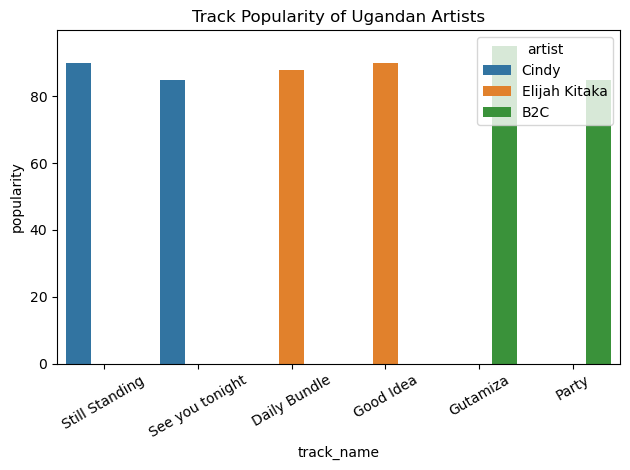

API or general error: 'UgandaMusicAnalytics' object has no attribute 'save_to_json'


In [20]:

class LocalArtistAnalytics(UgandaMusicAnalytics):
    def filter_ugandan_tracks(self, df):
        """Filter only tracks produced in Uganda"""
        return df[df["country"] == "Uganda"]

try:
    music = UgandaMusicAnalytics(mock_data)
    df_tracks = music.fetch_top_tracks()
    print("\n🎵 All Tracks:\n", df_tracks)
    local_music = LocalArtistAnalytics(mock_data)
    ugandan_df = local_music.filter_ugandan_tracks(df_tracks)
    print("\n🇺🇬 Ugandan Only Tracks:\n", ugandan_df)


# plot a seaborn bar chart
    sns.barplot(x="track_name", y="popularity", hue="artist", data=ugandan_df)
    plt.title("Track Popularity of Ugandan Artists")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## Save to JSON
    music.save_to_json(ugandan_df)
except Exception as e:
    print(f"API or general error: {e}")


Queztion 6
# Bank of uganda exchnage rate


In [21]:
# import libries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

In [22]:
# ExchangeRatePipeline
data = [
    {"date": "2025-01-01", "USD": 3700, "GBP": 4700, "EUR": 4000},
    {"date": "2025-01-02", "USD": 3720, "GBP": 4710, "EUR": 4020},
    {"date": "2025-02-01", "USD": 3750, "GBP": 4750, "EUR": 4050},
    {"date": "2025-02-02", "USD": 3760, "GBP": 4740, "EUR": 4060},
    {"date": "2025-03-01", "USD": 3780, "GBP": 4760, "EUR": 4070}
]

class ExchangeRatePipeline:
    def __init__(self, data):
        self.data = data

    def load_data(self):
        # load json data into a pandas DataFrame
        df = pd.DataFrame(self.data)
        df['date'] = pd.to_datetime(df['date'])
        return df

    def clean_data(self, df):
        # remove missing values (if any)
        df = df.dropna()
        return df



In [23]:
# monthly averages 
def monthly_average(self, df):
    df['month'] = df['date'].dt.to_period('M')
    avg = df.groupby('month')[['USD', 'GBP', 'EUR']].mean().reset_index()
    return avg
    

In [24]:
#plot exchange trends
def plot_trend(self, df):
        # plot rates
        plt.plot(df['month'].astype(str), df['USD'], label='USD')
        plt.plot(df['month'].astype(str), df['GBP'], label='GBP')
        plt.plot(df['month'].astype(str), df['EUR'], label='EUR')
        plt.title("Exchange Rate Trends (UGX)")
        plt.xlabel("Month")
        plt.ylabel("Rate")
        plt.legend()
        plt.show()

In [25]:
# export processed data to both csv and json
def save_files(self, df):
    df.to_csv("exchange_rates.csv", index=False)
    df.to_json("exchange_rates.json", orient="records", indent=4)
    print("✅ Data saved to exchange_rates.csv and exchange_rates.json")


In [26]:
# exception handling for missing data or HTTP errors
try:
    pipe = ExchangeRatePipeline(data)
    df = pipe.load_data()
    df = pipe.clean_data(df)
    avg = pipe.monthly_average(df)
    print("\n📊 Monthly Average Rates:\n", avg)
    pipe.plot_trend(avg)
    pipe.save_files(avg)

except Exception as e:
    print("⚠️ Error:", e)

⚠️ Error: 'ExchangeRatePipeline' object has no attribute 'monthly_average'
